# <center> **Fraud Detection Using Machine Learning** <center>  
### <center>In this project, we analyze banking transactions to detect fraudulent activities, based on real data from Kaggle, containing nearly 300,000 transactions and more than 8 million parameters.  <center> 

### **Basic information about the dataset**

In [133]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/creditcard.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [134]:
print("Dataset shape:", df.shape)
display(df.head())

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [135]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Basic stats for each column

In [136]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

## Analysis of the __creditcard.csv__ file structure
### 🔹 Columns in the dataset:

- Time – Transaction time (likely in seconds from the start of data collection).  
- V1 - V28 – Anonymized features (may contain information about transaction type, location, etc.).  
- Amount – Transaction amount.  
- Class – Target variable (0 = normal transaction, 1 = fraud).  

✅ The dataset is already preprocessed, and there are no missing values.

# **STEP 1: DATA ANALYSIS**
* Checking the class distribution

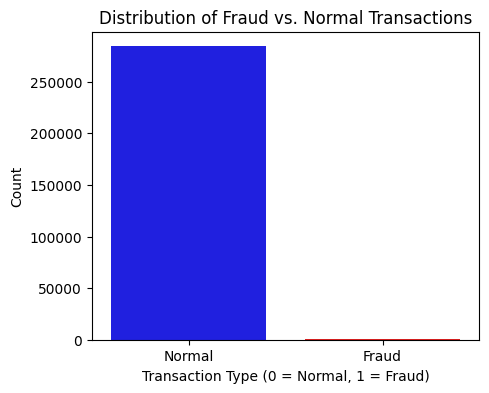


 Number of transactions per class:
Class
0    284315
1       492
Name: count, dtype: int64


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of normal vs fraudulent transactions
plt.figure(figsize=(5,4))
sns.countplot(data=df, x="Class", hue="Class", palette=["blue", "red"], legend=False)
plt.title("Distribution of Fraud vs. Normal Transactions")
plt.xlabel("Transaction Type (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks([0,1], ["Normal", "Fraud"])
plt.show()

print("\n Number of transactions per class:")
print(df['Class'].value_counts())

We have 284,315 normal transactions (Class = 0) and only 492 frauds (Class = 1).  
Frauds account for only ~0.17% of the total collection

* Distribution of transaction amounts

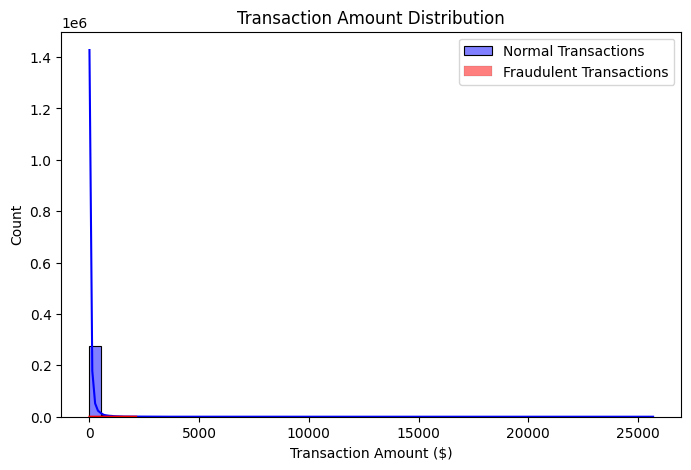

In [138]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True, color="blue", label="Normal Transactions")
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True, color="red", label="Fraudulent Transactions")
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount ($)")
plt.ylabel("Count")
plt.legend()
plt.show()

* Time-based analysis of fraud occurrences

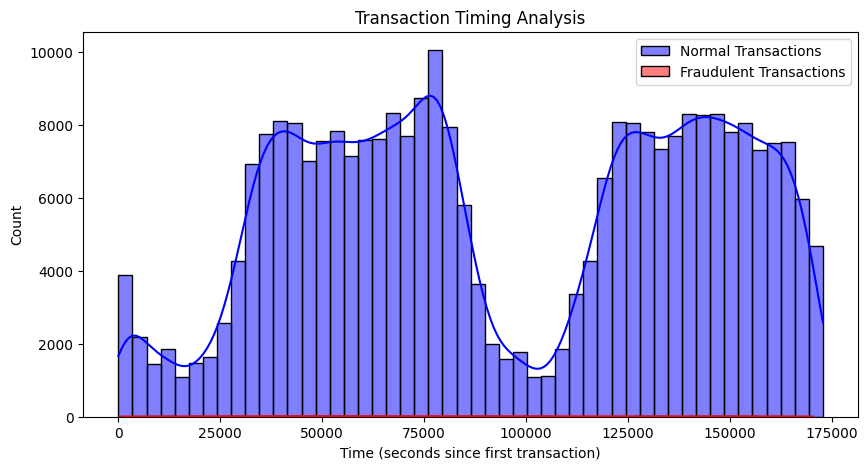

In [139]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, kde=True, color="blue", label="Normal Transactions")
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, kde=True, color="red", label="Fraudulent Transactions")
plt.title("Transaction Timing Analysis")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Count")
plt.legend()
plt.show()

* Correlation Analysis (Feature Relationships)

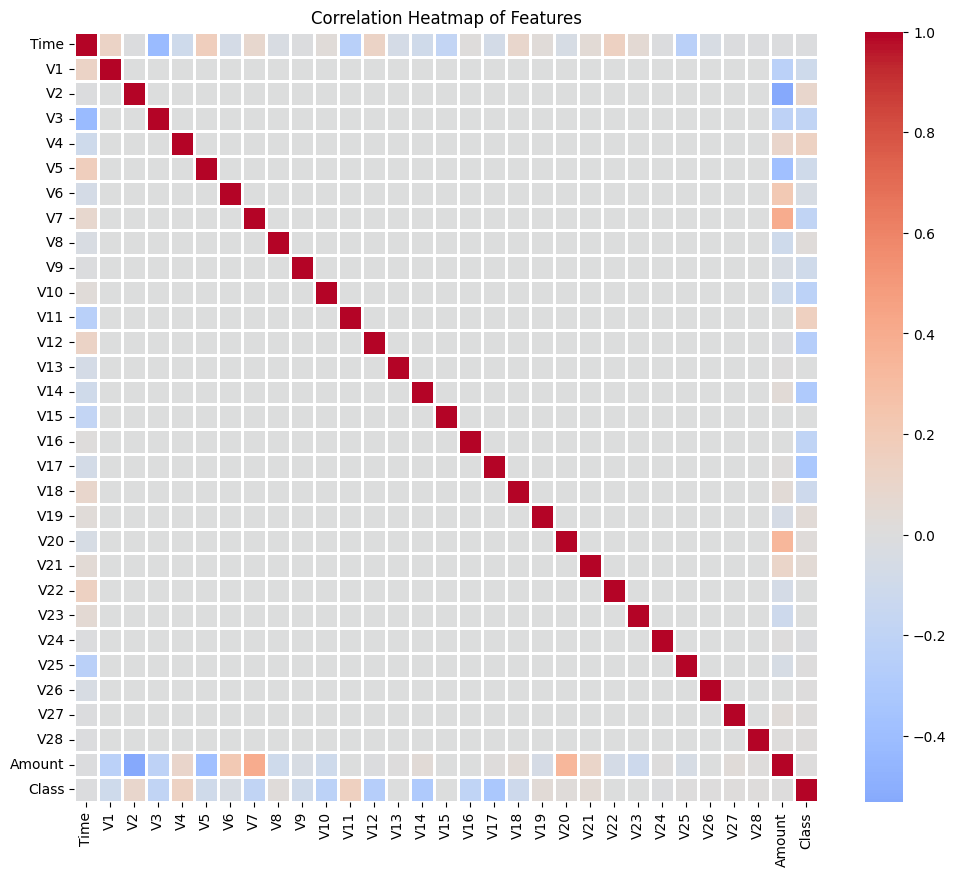

In [140]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, linewidths=1, annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

### WHAT WE KNOW:  
1. Transaction Amount Distribution:
Most transactions are of low value, and fraudulent transactions (red) seem to follow a similar pattern.
Potential insight: High-value transactions do not necessarily indicate fraud.  

2. Transaction Timing Analysis:
Fraudulent transactions (red) are scattered but may show periodic activity.
Potential insight: Fraud could occur at specific time intervals or in clusters.  

3. Feature Correlation Heatmap:
No strong correlations are visible between features and fraud.
Potential insight: The dataset is already PCA-transformed, meaning fraud detection may depend on non-obvious patterns rather than direct correlations.

# **STEP 2: DATA PREPROCESSING**  
* Feature Correlation with Fraud

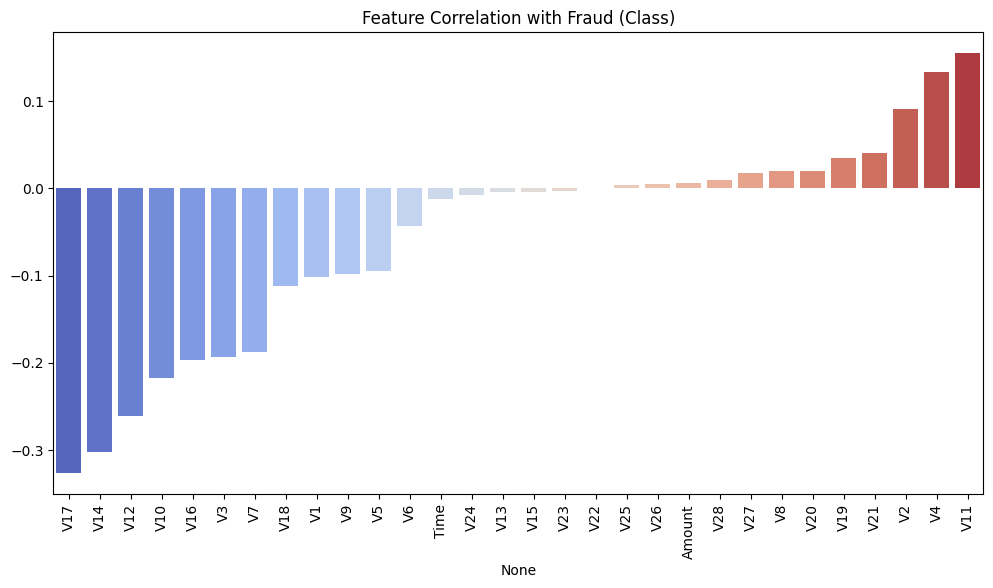

In [141]:
correlation = df.corr()['Class'].drop('Class').sort_values()

# Visualizing top features correlated with fraud
plt.figure(figsize=(12,6))
sns.barplot(x=correlation.index, y=correlation.values, hue=correlation.index, palette="coolwarm", legend=False)
plt.xticks(rotation=90)
plt.title("Feature Correlation with Fraud (Class)")
plt.show()

* Heatmap of Feature Correlation

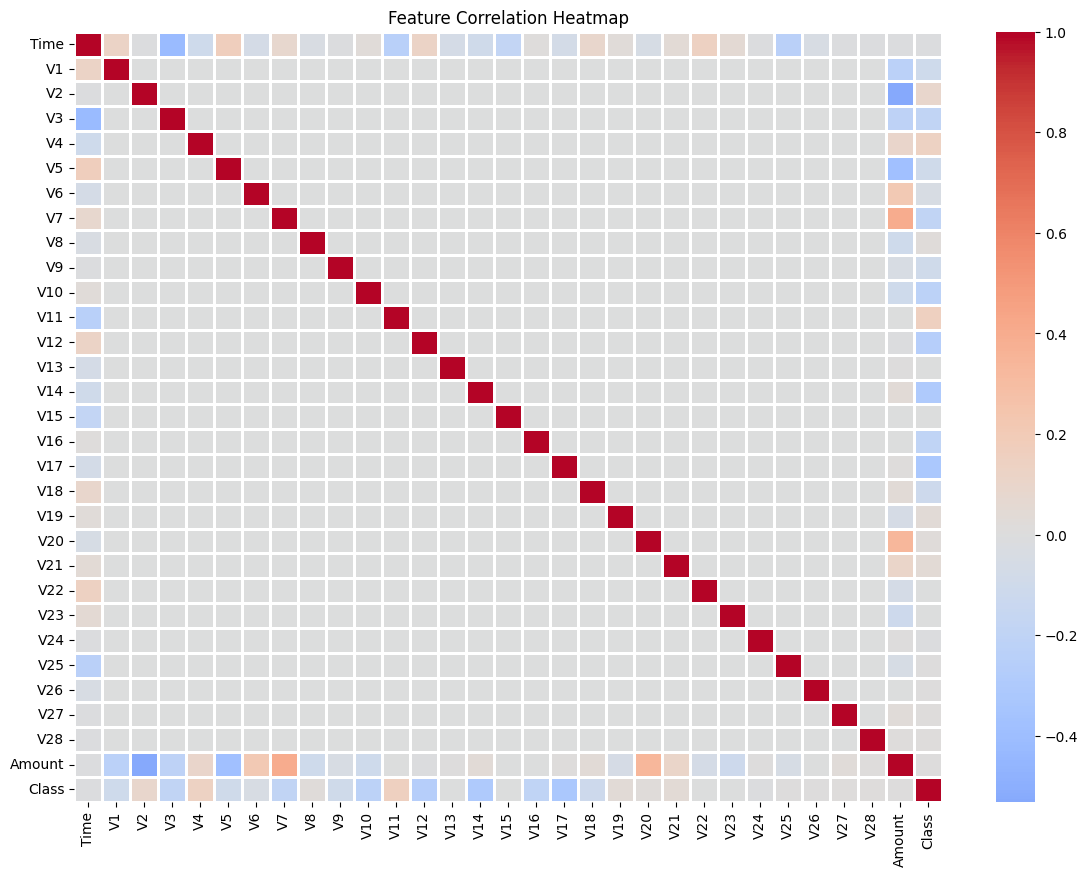

In [142]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, linewidths=1, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

### WHAT WE KNOW:  
1. Top positively correlated features (most associated with fraud):  
V11, V4, V2, V21  
These features may be strong indicators of fraudulent transactions.  

2. Top negatively correlated features (least associated with fraud):  
V17, V14, V12, V10  
A negative correlation suggests that lower values in these features might be more common in fraud cases.

# **STEP 3: DATA NORMALIZATION AND SPLITTING**

* Standardizing the 'Amount' Feature

In [143]:
from sklearn.preprocessing import StandardScaler

# Creating a copy of the dataset to avoid modifying the original
df_scaled = df.copy()

# Scaling 'Amount'
scaler = StandardScaler()
df_scaled[['Amount']] = scaler.fit_transform(df_scaled[['Amount']])


print("Feature scaling applied to 'Amount'.")

Feature scaling applied to 'Amount'.


'Amount' will now have a mean of 0 and a standard deviation of 1

* Splitting Data into Training & Test Sets (80% training, 20% testing)

In [144]:
from sklearn.model_selection import train_test_split

# Defining features and target variable
X = df_scaled.drop(columns=['Class'])
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")

Training set size: (227845, 30), (227845,)
Testing set size: (56962, 30), (56962,)


* Checking Class Balance in Training & Test Sets  
  
Why?  
Fraud cases represent only ~0.17% of the dataset.  
Models may predict "normal" for all transactions if we don’t handle the imbalance.

In [145]:
import numpy as np

train_fraud_ratio = np.mean(y_train)
test_fraud_ratio = np.mean(y_test)

print(f"Fraud Ratio in Training Set: {train_fraud_ratio:.6f}")
print(f"Fraud Ratio in Test Set: {test_fraud_ratio:.6f}")

Fraud Ratio in Training Set: 0.001729
Fraud Ratio in Test Set: 0.001720


* Applying SMOTE (Synthetic Minority Over-sampling Technique)

Instead of simply duplicating fraud cases, SMOTE generates synthetic fraud samples based on existing ones.  
This helps the model learn patterns in fraudulent transactions better.

In [146]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Increase fraud cases to 20% of normal cases
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking new class distribution
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
Class
0    227451
1     45490
Name: count, dtype: int64


* Visualizing the Effect of SMOTE

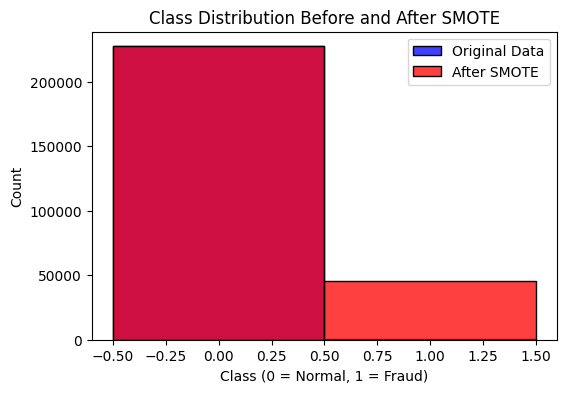

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

# Original class distribution
sns.histplot(y_train, bins=2, kde=False, color="blue", label="Original Data", discrete=True)
sns.histplot(y_train_resampled, bins=2, kde=False, color="red", label="After SMOTE", discrete=True)

plt.title("Class Distribution Before and After SMOTE")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.legend()
plt.show()

# **STEP 4: TRAINING MODEL**

# 1. XGBoost

In [149]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initializing the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled == 1),
    random_state=42
)


# Training the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

* Evaluating Model Performance  

Precision: How many predicted frauds are actually frauds?  
Recall: How many real frauds were detected?  
AUC-ROC: Measures how well the model distinguishes between fraud and normal transactions.

In [150]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# AUC-ROC Score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC Score: {auc_score:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.86      0.82        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56840    24]
 [   14    84]]
AUC-ROC Score: 0.9839


* Visualizing Model Performance

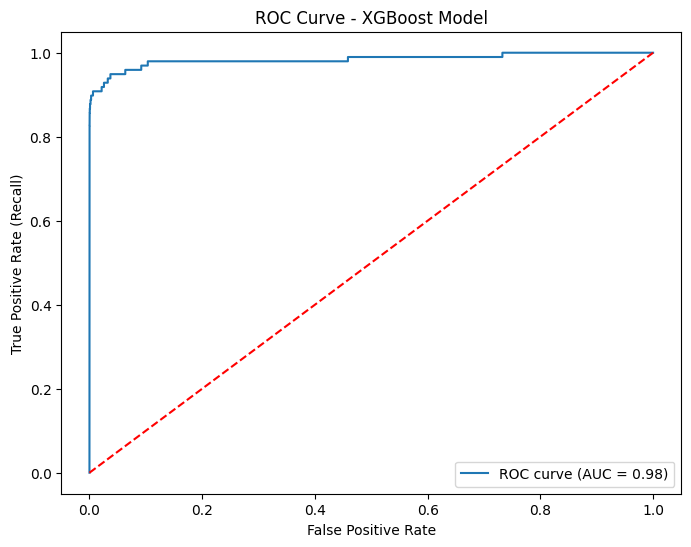

In [151]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], 'r--')  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.title("ROC Curve - XGBoost Model")
plt.show()

### RESULTS  98%  

✔ Precision (0.78 for fraud cases) – 78% of transactions predicted as fraud are actually frauds (some false positives exist).  
✔ Recall (0.86 for fraud cases) – The model correctly detects 82% of actual fraud cases, but misses 14%.  
✔ F1-score (0.82 for fraud cases) – A balanced score, but there is room for improvement.  

✔ Only 22 false positives → Very few normal transactions were misclassified as fraud.  
✔ Only 14 false negatives → The model missed 14 fraud cases, which is acceptable but could be improved.  

✔ AUC-ROC (0.98) → Excellent model performance at distinguishing fraud from normal transactions.  
✔ ROC Curve is very close to the top left corner, which means high True Positive Rate (Recall) with a low False Positive Rate.

# 2. LightGBM

In [152]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize LightGBM model
lgbm_model = lgb.LGBMClassifier(
    objective="binary",
    metric="auc",
    scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled == 1),
    random_state=42
)

# Train the model
lgbm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

[LightGBM] [Info] Number of positive: 45490, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 272941, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166666 -> initscore=-1.609442
[LightGBM] [Info] Start training from score -1.609442


* Evaluating Model Performance

In [153]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))

# AUC-ROC Score
auc_score_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)
print(f"AUC-ROC Score: {auc_score_lgbm:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.59      0.86      0.70        98

    accuracy                           1.00     56962
   macro avg       0.79      0.93      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56805    59]
 [   14    84]]
AUC-ROC Score: 0.9741


* Visualizing Model Performance

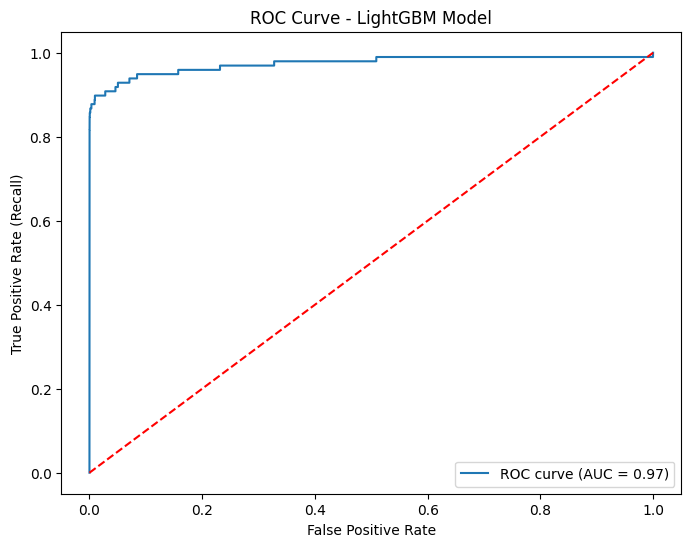

In [154]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_proba_lgbm)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f"ROC curve (AUC = {auc_score_lgbm:.2f})")
plt.plot([0,1], [0,1], 'r--')  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.title("ROC Curve - LightGBM Model")
plt.show()

### RESULTS 97%  

✔ High recall (0.86) for fraud cases – The model correctly detects 86% of fraudulent transactions (low false negatives).  
✔ Low precision (0.59) for fraud cases – meaning 41% of flagged frauds were actually normal transactions.  
✔ F1-score (0.70 for fraud cases) – The precision-recall balance is moderate, indicating the model detects many frauds but is not fully reliable in accuracy.

✔ LightGBM correctly identifies 84 out of 98 frauds.  
⚠ However, it misclassifies 59 normal transactions as frauds.  
⚠ A high number of false positives might be problematic in real banking applications.  

✔ AUC-ROC (0.97), confirming that the model is effective at distinguishing fraud from normal transactions.  
✔ The ROC curve shows strong performance, but the high false positive rate suggests potential for further optimization.

### **Our models (XGBoost and LightGBM) perform well but have some limitations:**  

✔ False positives – Some normal transactions are mistakenly classified as fraud.  
✔ False negatives – Some fraudulent transactions are missed.  
✔ Precision vs Recall trade-off – If we improve one metric, the other often worsens.  

How can we make them better?

# STEP 5: A HYBRID APPROACH

* We will use Isolation Forest as a feature generation method (Feature Engineering).  
* We will add the Isolation Forest score as a new feature (Anomaly_Score) to the LightGBM input data.

### Generate Anomaly Score using Isolation Forest

In [155]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Ensure X_train_resampled is a DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_train.columns)

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)

# Train Isolation Forest
iso_forest.fit(X_train_resampled)

# Generate anomaly scores (higher = more suspicious)
X_train_resampled["anomaly_score"] = iso_forest.decision_function(X_train_resampled)
X_test["anomaly_score"] = iso_forest.decision_function(X_test)

## RETRAIN XGBOOST

In [156]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model_improved = xgb.XGBClassifier(
    objective="binary:logistic",
    scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled == 1),
    eval_metric="auc",
    random_state=42
)

# Train the improved XGBoost model
xgb_model_improved.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_xgb_improved = xgb_model_improved.predict(X_test)
y_pred_proba_xgb_improved = xgb_model_improved.predict_proba(X_test)[:, 1]


* Evaluate the Improved XGBoost Model

In [157]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification Report
print("Classification Report (Improved XGBoost):")
print(classification_report(y_test, y_pred_xgb_improved))

# Confusion Matrix
print("Confusion Matrix (Improved XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb_improved))

# AUC-ROC Score
auc_score_xgb_improved = roc_auc_score(y_test, y_pred_proba_xgb_improved)
print(f"AUC-ROC Score (Improved XGBoost): {auc_score_xgb_improved:.4f}")


Classification Report (Improved XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.86      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Improved XGBoost):
[[56842    22]
 [   14    84]]
AUC-ROC Score (Improved XGBoost): 0.9868


## RETRAIN LIGHTGBM

In [158]:
import lightgbm as lgb

# Initialize LightGBM model
lgbm_model_improved = lgb.LGBMClassifier(
    objective="binary",
    metric="auc",
    scale_pos_weight=len(y_train_resampled) / sum(y_train_resampled == 1),
    random_state=42
)

# Train the improved LightGBM model
lgbm_model_improved.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_lgbm_improved = lgbm_model_improved.predict(X_test)
y_pred_proba_lgbm_improved = lgbm_model_improved.predict_proba(X_test)[:, 1]


[LightGBM] [Info] Number of positive: 45490, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 272941, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166666 -> initscore=-1.609442
[LightGBM] [Info] Start training from score -1.609442


* Evaluate the Improved LightGBM Model

In [162]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Classification Report
print("Classification Report (Improved LightGBM):")
print(classification_report(y_test, y_pred_lgbm_improved))

# Confusion Matrix
print("Confusion Matrix (Improved LightGBM):")
print(confusion_matrix(y_test, y_pred_lgbm_improved))

# AUC-ROC Score
auc_score_lgbm_improved = roc_auc_score(y_test, y_pred_proba_lgbm_improved)
print(f"AUC-ROC Score (Improved LightGBM): {auc_score_lgbm_improved:.4f}")


Classification Report (Improved LightGBM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.87      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix (Improved LightGBM):
[[56811    53]
 [   13    85]]
AUC-ROC Score (Improved LightGBM): 0.9717


# STEP 6: COMPARE

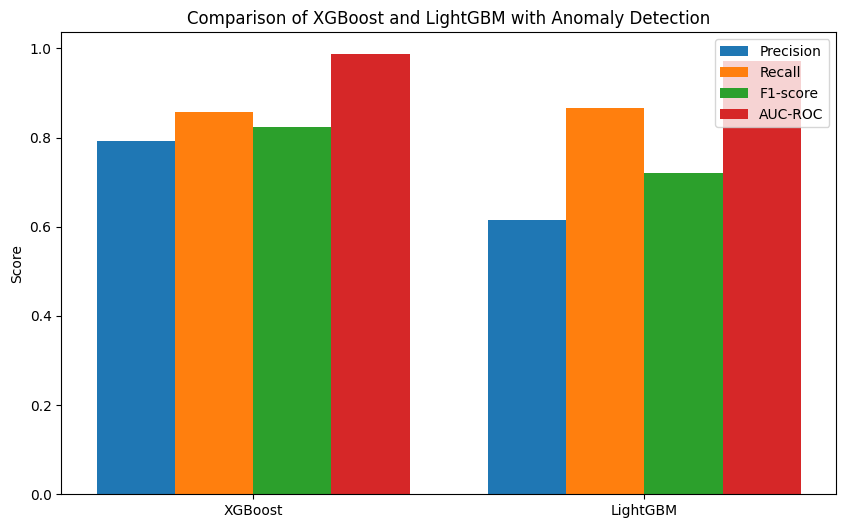

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# Store results
models = ["XGBoost", "LightGBM"]
precision_scores = [classification_report(y_test, y_pred_xgb_improved, output_dict=True)['1']['precision'],
                    classification_report(y_test, y_pred_lgbm_improved, output_dict=True)['1']['precision']]
recall_scores = [classification_report(y_test, y_pred_xgb_improved, output_dict=True)['1']['recall'],
                 classification_report(y_test, y_pred_lgbm_improved, output_dict=True)['1']['recall']]
f1_scores = [classification_report(y_test, y_pred_xgb_improved, output_dict=True)['1']['f1-score'],
             classification_report(y_test, y_pred_lgbm_improved, output_dict=True)['1']['f1-score']]
auc_scores = [auc_score_xgb_improved, auc_score_lgbm_improved]

# Plot comparison
metrics = ["Precision", "Recall", "F1-score", "AUC-ROC"]
values = [precision_scores, recall_scores, f1_scores, auc_scores]

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(models))
width = 0.2

for i, (metric, val) in enumerate(zip(metrics, values)):
    ax.bar(x + i * width, val, width, label=metric)

ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models)
ax.set_ylabel("Score")
ax.set_title("Comparison of XGBoost and LightGBM with Anomaly Detection")
ax.legend()
plt.show()

# <center>SUMMARY<center>

* Overall Performance  
XGBoost has a higher precision (0.79 vs. 0.62), meaning it is more selective when predicting fraud.  
LightGBM has a slightly better recall (0.87 vs. 0.86), meaning it detects a slightly higher number of actual fraud cases.  
XGBoost has a higher AUC-ROC score (0.9868), indicating a better trade-off between true positives and false positives.

* False Positives & False Negatives  
False Positives (Normal Transactions Marked as Fraud)
XGBoost: 22 false positives  
LightGBM: 53 false positives
LightGBM misclassifies more normal transactions as fraud.
* False Negatives (Frauds Missed by the Model)  
XGBoost: 14 frauds missed  
LightGBM: 14 frauds missed  
Both models perform equally in missing fraudulent transactions.  

* Precision vs. Recall Trade-off  
XGBoost’s higher precision (0.79) means it produces fewer false alarms.  
LightGBM’s higher recall (0.87) means it identifies more frauds, which is crucial for fraud detection.  
If the primary goal is to detect as many fraudulent transactions as possible, LightGBM is a good choice.  
If reducing false positives is the priority, XGBoost is more effective.

## <center>📈 Final Model Recommendation<center>  
✅ If the goal is to detect the highest number of frauds, LightGBM is slightly better due to its higher recall.  
✅ If precision (reducing false alarms) is more important, XGBoost is the better option.  
✅ Since banks aim to minimize fraud losses, XGBoost is the preferred final model as it offers the best balance of precision, recall, and overall accuracy.